In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data = pd.read_csv('googleplaystore.csv')

In [3]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


***DESCRIPTIVE ANALYSIS***

- App: Application name
- Category: Category the app belongs to
- Rating: Overall user rating of the app (as when scraped)
- Reviews: Number of user reviews for the app (as when scraped)
- Size: Size of the app (as when scraped)
- Installs: Number of user downloads/installs for the app (as when scraped)
- Type: Paid or Free
- Price: Price of the app (as when scraped)
- Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
- Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to   Music, Game, Family genres.
- Last Updated: Date when the app was last updated on Play Store (as when scraped)
- Current Ver: Current version of the app available on Play Store (as when scraped)
- Android Ver: Min required Android version (as when scraped)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.shape

(10841, 13)

In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Lets figure out whether we have some invalid entries in data or not?**

In [8]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- while preprocessing and viewing the data we observe that in this Datasets the maximum rating of an app is 19 which is not posible ,we know that the maximum rating of an app in the google play store is 5.

- *so we confidently says that something wrong.*


- *By viewing this we say that in this row all data are placed wrong by one position so we shift the data to the right hand size and make correct position.*

In [9]:
data.iloc[10472,1:]=data.iloc[10472,1:].shift(1)

***Feature Engineering of Last_updated feature..***

- Here we added 2 more columns in the data set by spliting the last updated attribute, 
- By doing this we find that in which year apps are added or updated on playstore.

In [10]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])

In [11]:
data['Last Updated'].dtype

dtype('<M8[ns]')

In [12]:
data['year_added']=data['Last Updated'].dt.year
data['month_added']=data['Last Updated'].dt.month

In [13]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


#### What type of services people loves either paid or free??

In [14]:
data['Type'].isna().sum()

1

In [15]:
data.dropna(subset=['Type'],inplace=True)

In [16]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [17]:
labels=data['Type'].unique()
values=data['Type'].value_counts()

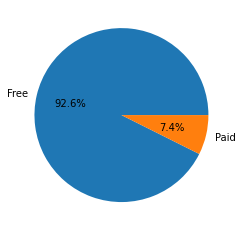

In [18]:
plt.pie(values,labels = labels,autopct='%1.1f%%')
plt.show()

- Here we see that 92.6% apps are free and 7.4% apps are paid on google playstore.
- so we say that Most of the people love free services.

### Performing analysis with respect to both free & paid applications..

In [19]:
df1=data[data['Type']=='Free']
df2=data[data['Type']=='Paid']

In [20]:
free=df1['year_added'].value_counts().reset_index()
free.columns=['year','count']
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [21]:
paid=df2['year_added'].value_counts().reset_index()
paid.columns=['year','count']
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [22]:
## the value of count is not present for the year 2010 for 'paid' dataset.

row={'year':2010,'count':0}
paid=paid.append(row,ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


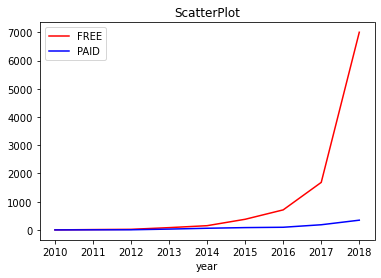

In [23]:
ax = plt.gca()
free.plot(kind = 'line',x = 'year',y = 'count',color = 'red',label = 'FREE',ax = ax)
paid.plot(kind = 'line',x = 'year',y = 'count',color = 'blue',label = 'PAID',ax = ax)
plt.title('ScatterPlot')
plt.show()

### In which month Free apps added are most??

In [24]:
free=df1.groupby('month_added')['month_added'].count()
free.columns=['month','count']
free

month_added
1      444
2      489
3      595
4      553
5      897
6     1179
7     3022
8     1511
9      283
10     357
11     347
12     363
Name: month_added, dtype: int64

<AxesSubplot:xlabel='month_added'>

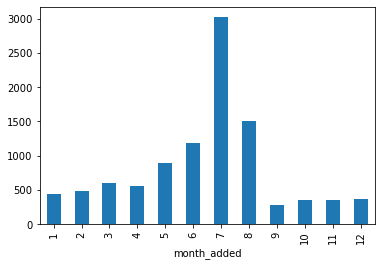

In [25]:
free.plot.bar()

### In which month Paid apps added are most??

In [26]:
paid=df2.groupby('month_added')['month_added'].count()
paid.columns=['month','count']
paid

month_added
1      47
2      45
3      72
4      63
5      81
6      93
7     141
8      83
9      31
10     41
11     40
12     63
Name: month_added, dtype: int64

<AxesSubplot:xlabel='month_added'>

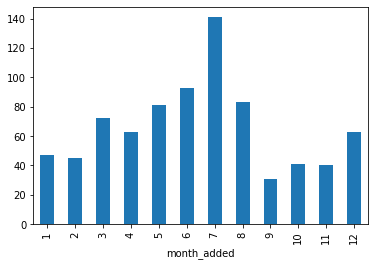

In [27]:
paid.plot.bar()

- Both free and paid apps where added in the month of **July**

#### Getting a distribution of Ratings

In [28]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.6, 2.2, 1.7, 2.0, 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [29]:
df1['Rating'].replace('1.9',1.9,inplace=True)

C:\Users\anusha\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
print(df1['Rating'].unique())
print("\nData Type of Rating is ",df1['Rating'].dtype)

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.6 2.2 1.7 2.  2.4 1.8 1.6
 2.1 1.4 1.5 1.2]

Data Type of Rating is  float64


In [31]:
df1['Rating'].isna().sum()

1320

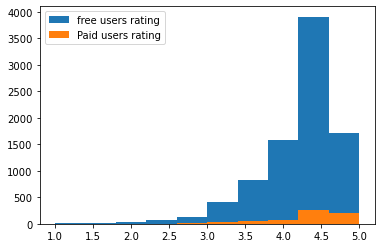

In [32]:
plt.hist(df1['Rating'].dropna(),label='free users rating')
plt.hist(df2['Rating'].dropna(),label='Paid users rating')
plt.legend()

#### FREE app rating distribution

In [33]:
df1['Rating'].value_counts().reset_index()

,index,Rating
0,4.4,1031
1,4.3,1025
2,4.5,965
3,4.2,890
4,4.6,741
5,4.1,676
6,4.0,546
7,4.7,446
8,3.9,370
9,3.8,282


#### PAID app rating distribution

In [34]:
df2['Rating'].value_counts().reset_index()

,index,Rating
0,4.6,82
1,4.4,78
2,4.5,73
3,4.2,62
4,4.7,53
5,4.3,51
6,4.8,39
7,4.1,32
8,5.0,28
9,4.0,22


### Analysing App Category

In [35]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [36]:
free = df1['Category'].value_counts().reset_index()
free = free.sort_values(by='Category')
free.columns = ['Category',"Count"]
free.head(5)

,Category,Count
32,BEAUTY,53
31,PARENTING,58
30,COMICS,60
29,ART_AND_DESIGN,62
28,EVENTS,63


<AxesSubplot:xlabel='Category'>

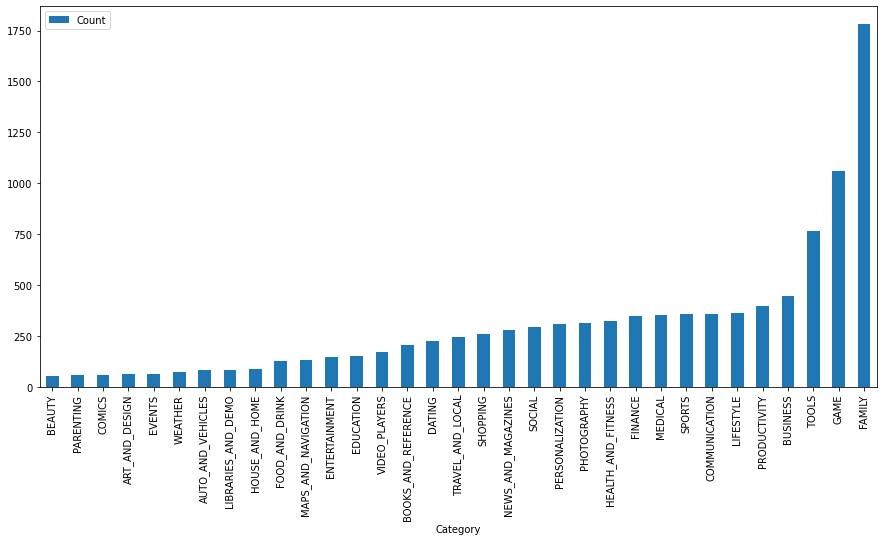

In [37]:
free.plot.bar('Category',"Count",figsize=(15,7))

In [38]:
paid = df2['Category'].value_counts().reset_index()
paid.columns = ['Category',"Count"]
paid.head(5)

,Category,Count
0,FAMILY,191
1,MEDICAL,109
2,GAME,83
3,PERSONALIZATION,83
4,TOOLS,78


<AxesSubplot:xlabel='Category'>

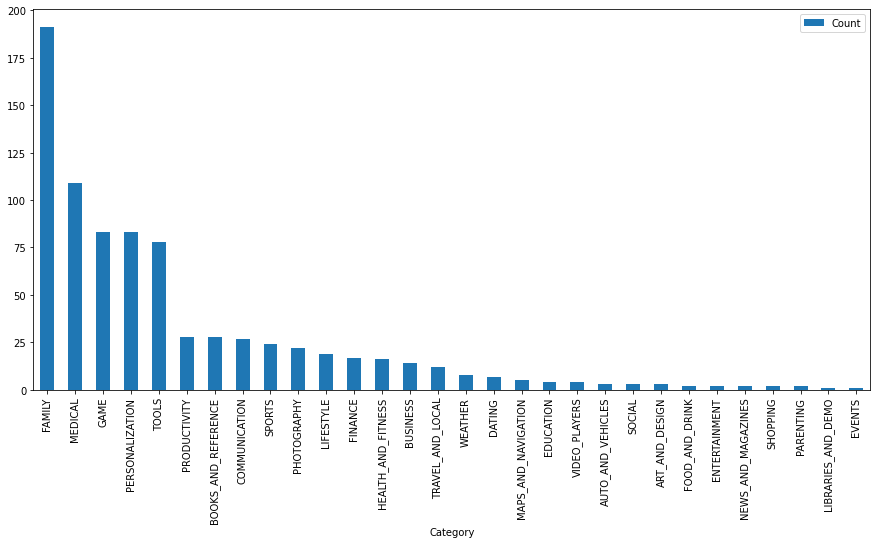

In [39]:
paid.plot.bar('Category',"Count",figsize=(15,7))

- There are many apps in the **Family** category

### Analysing Android version feature

In [40]:
free = df1['Android Ver'].value_counts().reset_index()
free.columns=['Android_Versions','COUNT']
free = free.sort_values(by='Android_Versions')
free.head(5)

,Android_Versions,COUNT
27,1.0 and up,2
19,1.5 and up,14
13,1.6 and up,77
17,2.0 and up,26
26,2.0.1 and up,2


<AxesSubplot:xlabel='Android_Versions'>

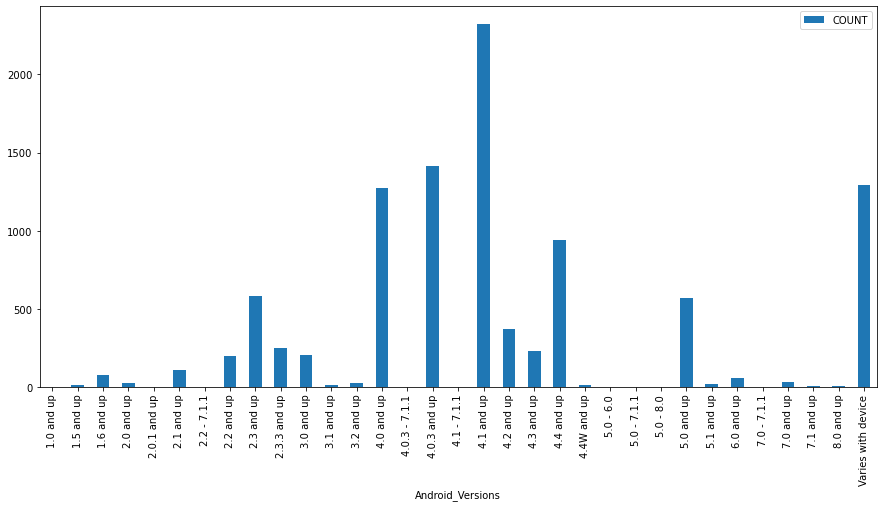

In [41]:
free.plot.bar('Android_Versions','COUNT',figsize=(15,7))

In [42]:
paid = df2['Android Ver'].value_counts().reset_index()
paid.columns=['Android_Versions','COUNT']
paid = paid.sort_values(by='Android_Versions')
paid.head(5)

,Android_Versions,COUNT
16,1.5 and up,6
7,1.6 and up,39
17,2.0 and up,6
18,2.0.1 and up,5
11,2.1 and up,27


<AxesSubplot:xlabel='Android_Versions'>

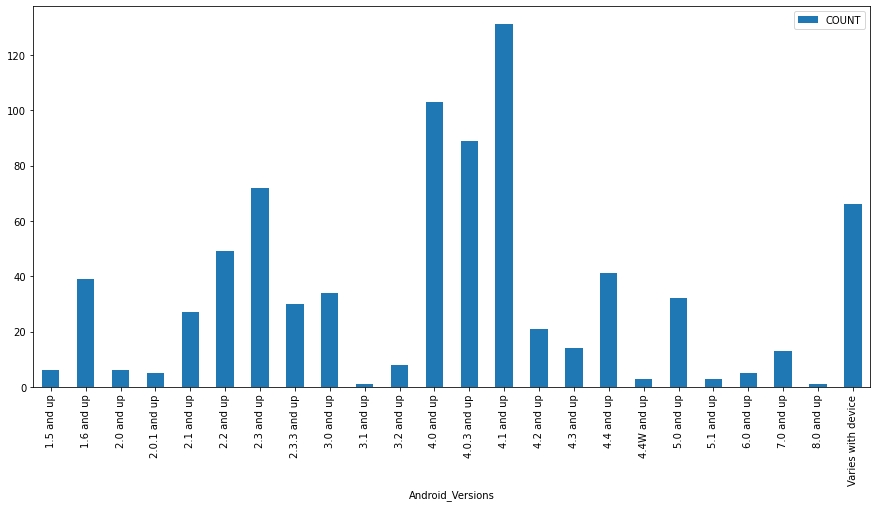

In [43]:
paid.plot.bar('Android_Versions','COUNT',figsize=(15,7))

### Total Installs distribution

In [44]:
free = df1['Installs'].value_counts().reset_index()
free.columns=['Installs','COUNT']
free = free.sort_values(by='Installs')
free.head(5)

,Installs,COUNT
19,0+,4
18,1+,46
4,"1,000+",759
0,"1,000,000+",1555
17,"1,000,000,000+",58


<AxesSubplot:xlabel='Installs'>

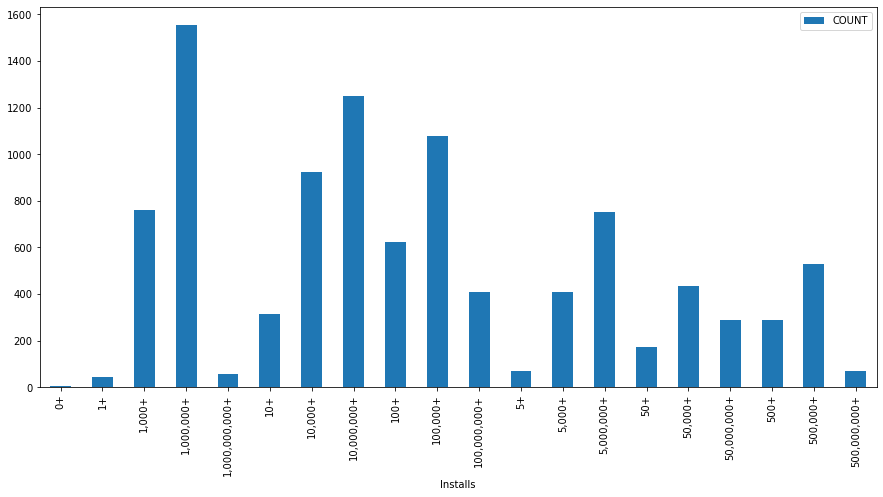

In [45]:
free.plot.bar('Installs','COUNT',figsize=(15,7))

In [46]:
paid = df2['Installs'].value_counts().reset_index()
paid.columns=['Installs','COUNT']
paid = paid.sort_values(by='Installs')
paid.head(5)


,Installs,COUNT
13,0+,10
10,1+,21
0,"1,000+",149
9,"1,000,000+",24
4,10+,70


<AxesSubplot:xlabel='Installs'>

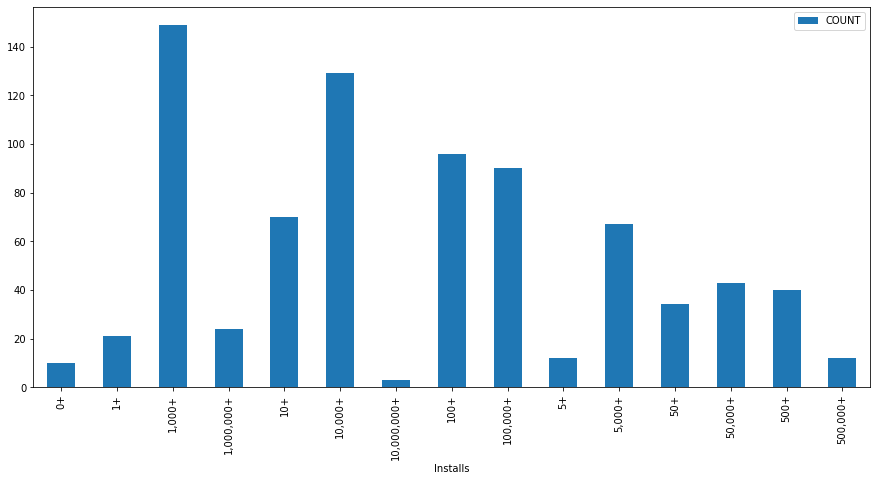

In [47]:
paid.plot.bar('Installs','COUNT',figsize=(15,7))

**By observing the above plot, highest installs of the apps are crossing the 1M than 10M than 100k, very less app are crossing the 500M and dream install 1B . some apps like Instagram, Youtoube, Facebook Whtsapp etc are crossing the dream installs 1B.**

## Data Cleaning

In [48]:
print("data_shape: ",data.shape)
print('data_columns: ',data.columns)

data_shape:  (10840, 15)
data_columns:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')


In [49]:
data.dtypes

App                       object
Category                  object
Rating                    object
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

### Data Cleaning on Price feature

In [50]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [51]:
def remove_dollar(x):
    if x=='0':
        return 0
    else:
        return x[1:]

In [52]:
# creating a copy of data

dataframe=data.copy()

In [53]:
dataframe['Price']=dataframe['Price'].apply(remove_dollar)

In [54]:
dataframe['Price'].unique()

array([0, '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99', '299.99',
       '379.99', '37.99', '18.99', '389.99', '19.90', '8.49', '1.75',
       '14.00', '4.85', '46.99', '109.99', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '4.29',
       '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.20', '1.04'],
      dtype=object)

In [55]:
dataframe['Price']=dataframe['Price'].astype(float)
dataframe['Price'].dtype

dtype('float64')

### clean rating feature

In [56]:
dataframe['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [57]:
dataframe['Rating'].replace('1.9',1.9,inplace=True)

In [58]:
dataframe['Rating'].dtype

dtype('float64')

### clean review feature

In [59]:
dataframe['Reviews']=dataframe['Reviews'].astype(float)
dataframe['Reviews'].dtype

dtype('float64')

### Data Cleaning for installs

In [60]:
dataframe['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [61]:
def clean_installs(x):
    x=x.replace(',','')
    return int(x.replace('+',''))

In [62]:
dataframe['Installs']=dataframe['Installs'].apply(clean_installs)
dataframe['Installs'].dtype

dtype('int64')

### Data Cleaning on Size feature

In [63]:
dataframe['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [64]:
def convert_into_MB(x):
    if 'M' in x:
        return float(x[0:-1])
    else:
        mb=float(x[0:-1])/1024
        mb=np.round(mb,2)
        return mb

In [65]:
filter=dataframe['Size']=='Varies with device'
data_temp=dataframe[~filter]

In [66]:
data_temp['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10835    9.6M
10836     53M
10837    3.6M
10838    9.5M
10840     19M
Name: Size, Length: 9146, dtype: object

In [67]:
data_temp['Size']=data_temp['Size'].apply(convert_into_MB)

## finding the appropriate value to fill the missing value.
data_temp['Size'].median()

<ipython-input-67-c1c9fb31a26b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp['Size']=data_temp['Size'].apply(convert_into_MB)


13.0

In [68]:
dataframe['Size'].replace('Varies with device','13M',inplace=True)

In [69]:
dataframe['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '13M', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M',
       '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k',
       '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M',
     

In [70]:
dataframe['Size']=dataframe['Size'].apply(convert_into_MB)
dataframe['Size'].dtype

dtype('float64')

### Outliers Detection & Dealing with it..

### Outliers removal in Size using 1 std dev

C:\Users\anusha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

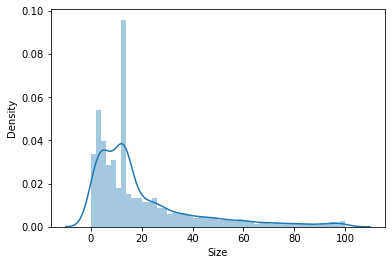

In [71]:
sns.distplot(dataframe['Size'])

In [72]:
# whatever data is outside of (mean +- 1*std dev) , just remove it..
def remove_outliers_sd(df,feature):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('Type'):
        m=np.mean(subdf[feature])
        sd=np.std(subdf[feature])
        reduced_df=subdf[(subdf[feature]>(m-sd)) & (subdf[feature]<=(m+sd))]
        
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [73]:
op=remove_outliers_sd(dataframe,'Size')
op.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


C:\Users\anusha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

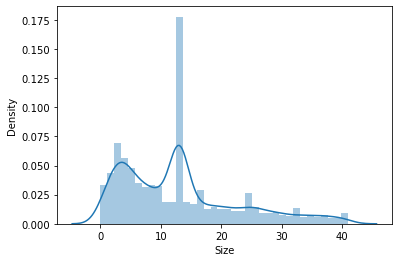

In [74]:
sns.distplot(op['Size'])

### Outliers in Installs using IQR(Interquantile Range)

C:\Users\anusha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs', ylabel='Density'>

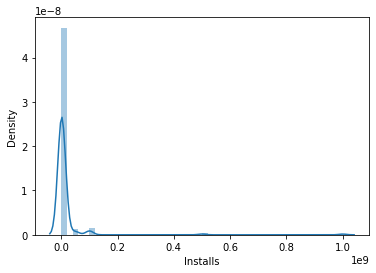

In [75]:
sns.distplot(op['Installs'])

C:\Users\anusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

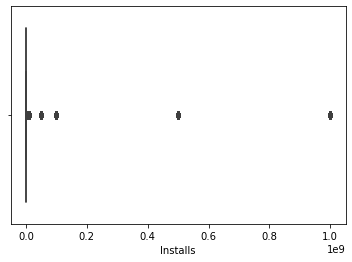

In [76]:
sns.boxplot(op['Installs'])

In [77]:
q1=op['Installs'].quantile(0.25)
q3=op['Installs'].quantile(0.75)
iqr=q3-q1
iqr

999000.0

In [78]:
lower_tail=q1-1.5*iqr
print('lower tail is: ',lower_tail)
upper_tail=q3+1.5*iqr
print('upper tail is: ',upper_tail)

lower tail is:  -1497500.0
upper tail is:  2498500.0


In [79]:
outliers=[]

for install in op['Installs']:
    if install > upper_tail or install < lower_tail:
        outliers.append(install)
    else:
        continue

In [80]:
len(outliers)

2207

In [81]:
### Replace Outliers with the median value

for install in op['Installs']:
    if install > upper_tail or install < lower_tail:
        op['Installs']=op['Installs'].replace(install,np.median(op['Installs']))
    else:
        continue

C:\Users\anusha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs', ylabel='Density'>

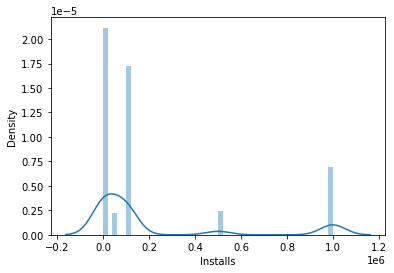

In [82]:
sns.distplot(op['Installs'])

C:\Users\anusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

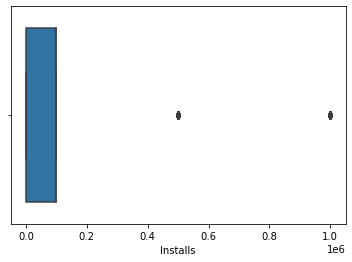

In [83]:
sns.boxplot(op['Installs'])

In [84]:
op2=op.copy()

### Outliers in Reviews

C:\Users\anusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

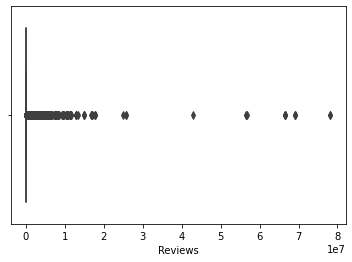

In [85]:
sns.boxplot(op2['Reviews'])

In [86]:
### Considering the value of 1e7(10^6) as Threshold value.

## data points that are > than 1e7 are outliers
threshold=1e7
op2[op2['Reviews']>threshold].shape

(58, 15)

In [87]:
print('median is: ',op2['Reviews'].median())
print('mean is: ',op2['Reviews'].mean())

median is:  1192.0
mean is:  349258.57628755365


#### Replacing Outliers with the Median..

In [88]:
op2['Reviews']=np.where(op2['Reviews']>threshold,op2['Reviews'].median(),op2['Reviews'])

In [89]:
print('median is: ',op2['Reviews'].median())
print('mean is: ',op2['Reviews'].mean())

median is:  1190.5
mean is:  193907.85922746782


C:\Users\anusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

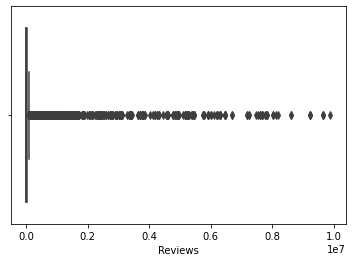

In [90]:
sns.boxplot(op2['Reviews'])

C:\Users\anusha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

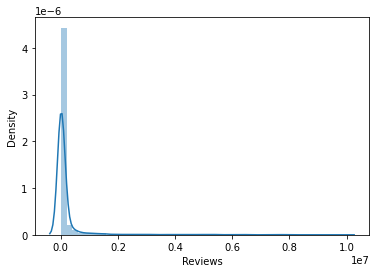

In [91]:
sns.distplot(op2['Reviews'])

- ***Still lots of right skewness***
- ***we can Log transformation to remove this positive skewness(high outliers)***

### Applying Log Transformation

In [92]:
op2['Reviews']=np.log1p(op2['Reviews'])

C:\Users\anusha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

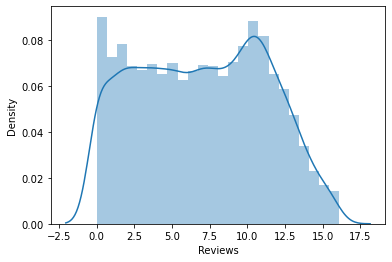

In [93]:
sns.distplot(op2['Reviews'])

### Filling missing values

#### lets fill out missing values first in Rating

In [94]:
op2['Rating'].isnull().sum()

1396

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

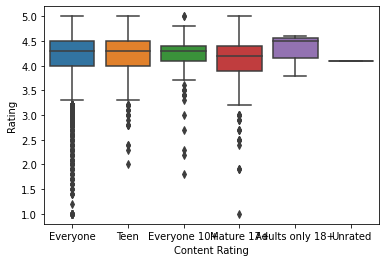

In [95]:
sns.boxplot(x='Content Rating',y='Rating',data=op2)

#we can visualise in box plot that,for class Everyone,avg rating is somewhere around 4.3,
## for Teen,it is around approx 4.3, 

In [96]:
op2.groupby('Content Rating')['Rating'].median()

Content Rating
Adults only 18+    4.5
Everyone           4.3
Everyone 10+       4.3
Mature 17+         4.2
Teen               4.3
Unrated            4.1
Name: Rating, dtype: float64

In [97]:
op2.groupby('Content Rating')['Rating'].mean()

Content Rating
Adults only 18+    4.300000
Everyone           4.178822
Everyone 10+       4.213910
Mature 17+         4.103448
Teen               4.212376
Unrated            4.100000
Name: Rating, dtype: float64

In [98]:
# A func where we r giving rating & content rating col in a list(cols)

def impute_Rating(cols):
    
    #first col is rating,2nd col is basically content rating..
    Rating=cols[0]
    Content_rating=cols[1]
    
    #ie if there is a null value in a col
    if pd.isnull(Rating):
        if Content_rating=='Adults only 18+':
            return 4.3
        elif Content_rating=='Everyone':
            return 4.17
        elif Content_rating=='Everyone 10+':
            return 4.21
        elif Content_rating=='Mature 17+':
            return 4.10
        elif Content_rating=='Teen':
            return 4.21
        else:
            return 4.10
        
    #when not null we basically return rating value     
    else:
        return Rating

In [99]:
#apply func
op2['Rating']=op2[['Rating','Content Rating']].apply(impute_Rating,axis=1)

In [100]:
op2['Rating'].isnull().sum()

0

<AxesSubplot:>

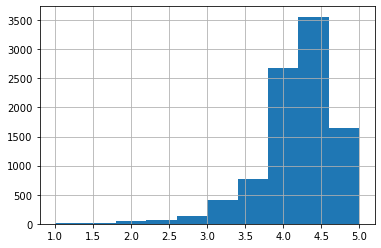

In [101]:
op2['Rating'].hist()

- as our Dependent feature count is varying alot  , as it is not a Normally distributed data  , as count of 4.1 is too high
- so if we will build a model considering this Rating feature ,our model accuracy gets fluctauted alot

- so we will do some manipulations on Rating & convert it into Discrete nature..

In [102]:
def convert(x):
    if x>0.0 and x<=1.5:
        return 1
    elif x>1.5 and x<=2.5:
        return 2
    elif x>2.5 and x<=3.5:
        return 3
    elif x>3.5 and x<=4.5:
        return 4
    else:
        return 5

In [103]:
op2['Rating']=op2['Rating'].apply(convert)
op2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,5.075174,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,4,6.875232,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


C:\Users\anusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

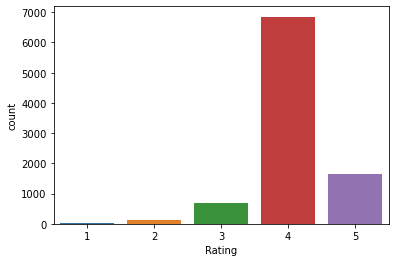

In [104]:
sns.countplot(op2['Rating'])

In [105]:
final=op2.copy()

## Feature Encoding

In [106]:
final.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

#### Perform Mean Encoding on Cateogry

In [107]:
mean_ordinal=final.groupby('Category')['Rating'].mean().to_dict()
mean_ordinal

{'ART_AND_DESIGN': 4.3076923076923075,
 'AUTO_AND_VEHICLES': 4.157894736842105,
 'BEAUTY': 4.2,
 'BOOKS_AND_REFERENCE': 4.223744292237443,
 'BUSINESS': 4.020642201834862,
 'COMICS': 4.033333333333333,
 'COMMUNICATION': 3.9894459102902373,
 'DATING': 3.891891891891892,
 'EDUCATION': 4.309859154929577,
 'ENTERTAINMENT': 4.022058823529412,
 'EVENTS': 4.258064516129032,
 'FAMILY': 4.076294277929155,
 'FINANCE': 4.04179104477612,
 'FOOD_AND_DRINK': 4.112068965517241,
 'GAME': 4.1397515527950315,
 'HEALTH_AND_FITNESS': 4.176470588235294,
 'HOUSE_AND_HOME': 4.095238095238095,
 'LIBRARIES_AND_DEMO': 4.075,
 'LIFESTYLE': 4.06371191135734,
 'MAPS_AND_NAVIGATION': 3.928,
 'MEDICAL': 4.093525179856115,
 'NEWS_AND_MAGAZINES': 4.0321428571428575,
 'PARENTING': 4.26,
 'PERSONALIZATION': 4.164021164021164,
 'PHOTOGRAPHY': 4.03,
 'PRODUCTIVITY': 4.094292803970223,
 'SHOPPING': 4.128514056224899,
 'SOCIAL': 4.100371747211896,
 'SPORTS': 4.080597014925373,
 'TOOLS': 3.9613059250302296,
 'TRAVEL_AND_LOCAL

In [108]:
final['Category']=final['Category'].map(mean_ordinal)
final['Category']

0       4.307692
1       4.307692
2       4.307692
3       4.307692
4       4.307692
          ...   
9315    4.076294
9316    4.176471
9317    4.139752
9318    4.076294
9319    4.076294
Name: Category, Length: 9320, dtype: float64

### applying Target Guided Mean encoding On Content_Rating

In [109]:
final['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [110]:
ordinal_labels=final.groupby('Content Rating')['Rating'].mean().sort_values().index

In [111]:
ordinal_labels

Index(['Unrated', 'Mature 17+', 'Everyone', 'Everyone 10+', 'Teen',
       'Adults only 18+'],
      dtype='object', name='Content Rating')

In [112]:
dict_store={key:value for value,key in enumerate(ordinal_labels,0)}
dict_store

{'Unrated': 0,
 'Mature 17+': 1,
 'Everyone': 2,
 'Everyone 10+': 3,
 'Teen': 4,
 'Adults only 18+': 5}

In [113]:
final['Content Rating']=final['Content Rating'].map(dict_store)

In [114]:
final.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,Free,0.0,2,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,Free,0.0,2,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


### applying Label Encoding on Type column

In [115]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
final['Type']=le.fit_transform(final['Type'])
final.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,0,0.0,2,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,0,0.0,2,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.307692,5,11.379520,8.7,100000,0,0.0,2,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8


#### drop all the un-necessary columns..

In [116]:
final.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [117]:
final.drop(labels=['App','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)
final.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,year_added,month_added
0,4.307692,4,5.075174,19.0,10000,0,0.0,2,2018,1
1,4.307692,4,6.875232,14.0,500000,0,0.0,2,2018,1


In [118]:
final.isna().sum()

Category          1
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
year_added        0
month_added       0
dtype: int64

In [119]:
final.dropna(inplace=True)

### Obtaining the Dependent and Independent variable

In [120]:
X=final.drop('Rating',axis=1)

In [121]:
X.head(5)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,year_added,month_added
0,4.307692,5.075174,19.0,10000,0,0.0,2,2018,1
1,4.307692,6.875232,14.0,500000,0,0.0,2,2018,1
2,4.307692,11.379520,8.7,100000,0,0.0,2,2018,8
3,4.307692,12.281389,25.0,100000,0,0.0,4,2018,6
4,4.307692,6.875232,2.8,100000,0,0.0,2,2018,6


In [122]:
y=final['Rating']
y.head(3)

0    4
1    4
2    5
Name: Rating, dtype: int64

### Splitting the data into train and test data

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

# Building ML model

## Logistic Regression Model

In [124]:
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

#### Making the Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = classifier_logistic.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy of Logistic Regression is: ',accuracy_score(y_test, y_pred)*100)
print('\nclassification_report\n',classification_report(y_test,y_pred))

[[   0    0    0    4    0]
 [   0    0    0   22    0]
 [   0    0    0  160    0]
 [   0    0    0 1350    0]
 [   0    0    0  328    0]]

The accuracy of Logistic Regression is:  72.42489270386267

classification_report
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00       160
           4       0.72      1.00      0.84      1350
           5       0.00      0.00      0.00       328

    accuracy                           0.72      1864
   macro avg       0.14      0.20      0.17      1864
weighted avg       0.52      0.72      0.61      1864



C:\Users\anusha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anusha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anusha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree Classification

In [126]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### Making the Confusion Matrix

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy of Decision Tree is: ',accuracy_score(y_test, y_pred)*100)
print('\nclassification_report\n',classification_report(y_test,y_pred))

[[   0    0    0    3    1]
 [   0    1    6    8    7]
 [   0    8   31  106   15]
 [   2   13   87 1039  209]
 [   0    4   20  165  139]]

The accuracy of Decision Tree is:  64.91416309012875

classification_report
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.04      0.05      0.04        22
           3       0.22      0.19      0.20       160
           4       0.79      0.77      0.78      1350
           5       0.37      0.42      0.40       328

    accuracy                           0.65      1864
   macro avg       0.28      0.29      0.28      1864
weighted avg       0.65      0.65      0.65      1864



## Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

#### Making the Confusion Matrix

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy of Random Forest is: ',accuracy_score(y_test, y_pred)*100)
print('\nclassification_report\n',classification_report(y_test,y_pred))

[[   0    0    0    4    0]
 [   0    0    4   18    0]
 [   0    0   23  136    1]
 [   2    1   26 1266   55]
 [   0    1    5  229   93]]

The accuracy of Random Forest is:  74.14163090128756

classification_report
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        22
           3       0.40      0.14      0.21       160
           4       0.77      0.94      0.84      1350
           5       0.62      0.28      0.39       328

    accuracy                           0.74      1864
   macro avg       0.36      0.27      0.29      1864
weighted avg       0.70      0.74      0.70      1864



### Hypertune Logistic Model

In [130]:
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()

In [131]:
grid={'C':10.0 ** np.arange(-2,3),'penalty':['l1','l2']}
grid

{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'penalty': ['l1', 'l2']}

In [132]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\anusha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anusha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\anusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [133]:
clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [141]:
log=LogisticRegression(C= 0.01, penalty= 'l2')
log.fit(X_train,y_train)
pred2=log.predict(X_test)
print('\nThe accuracy of Logistic Regression is: ',accuracy_score(y_test,pred2)*100)


The accuracy of Logistic Regression is:  72.42489270386267


C:\Users\anusha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Hypertune Random Forest Model

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
n_estimators=[int(x) for x in np.linspace(200,2000,5)]
max_features=["auto", "sqrt", "log2"]
max_depth=[int(x) for x in np.linspace(10,2000,5)]

min_samples_leaf=[1,2,4,6]
min_samples_split=[2,5,10,14]


random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split,
    'criterion':['entropy','gini']
}

In [137]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [138]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 507, 1005, 1502,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=100, verbose=2)

In [139]:
pred2=rf_randomcv.predict(X_test)
print('\nThe accuracy of Random Forest is: ',accuracy_score(y_test, pred2)*100)


The accuracy of Random Forest is:  75.5901287553648
